## The goal of this notebook is to prove that a Uniform Distribution yields an entirely predictable throughput
Let's start with a simple case. Let's make a prediction of what a team can deliver based on an equiprobably distribution over just 10 sprints. 

Let's say that their velocity is a random and uniform distribution where the throughput is betwee 0 items and 5 items delivered / sprint. 

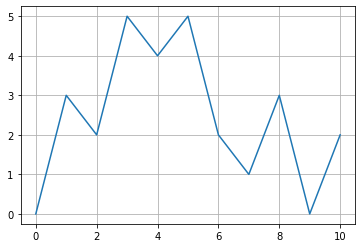

(array([2., 0., 1., 0., 3., 0., 2., 0., 1., 2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

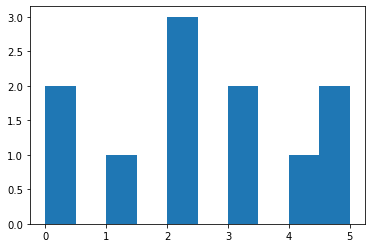

In [103]:
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(12) ## Make the sheet reproducible

n_sprints = 10
total_delivery = 0 ## initialize to zero
sprint_deliveries = [] ## initialize array
sprint_deliveries.append(0)
min_delivery = 0 ## team delivers 0 items in worst case (equiprobably, i.e. randomly)
max_delivery = 5 ## team delivers 5 items in best case (equiprobably, i.e. randomly)

def one_delivery():    
    for i in range(n_sprints):
        delivery = random.randrange(min_delivery,max_delivery+1,1)
        ## print("delivery: ", delivery, "\n")
        sprint_deliveries.append(delivery)  
    return sprint_deliveries
    
one_delivery()
pylab.plot(sprint_deliveries)
pylab.grid(True)
pylab.show()

counts, bins = np.histogram(sprint_deliveries)
plt.hist(bins[:-1], bins, weights=counts)

## Making sense of the data
So we have a distribution of "velocity data points" in `sprint_deliveries`
If we were to predict the number of items delivered after `n_sprints`, when the velocity follows a Uniform Distribution between two values (where all values are equally probable), then the result would be the number of sprints * mean velocity. Or, in the case of an equiproble distribution: 
Mean Velocity is 
$${\mu} = \frac{a + b}{2}$$
and the total delivery after 10 sprints would be 
$${10}{\mu}$$

In our case 
$${a} = {0}$$
and 
$${b} = {5}$$

So, 

$${total delivery} = {10} * \left( {\frac{0 + 5}{2}+-{\sigma}} \right)$$ 
or
$${total delivery} = {10} * \left( {2.5}+-{\sigma} \right)$$

or the interval between 11 and 39 if you take into account the standard deviation which is 1.44 (equation to be added later)
$${total delivery} = \left[11, 39\right]$$

However, the results converge very quickly to the average because we are talking about an Uniform distribution, as we shall see below

In [107]:
print( "total delivery after only",n_sprints,"is", sum(sprint_deliveries))
print( "average delivery over the same",n_sprints,"sprints is:", sum(sprint_deliveries) / len(sprint_deliveries))

total delivery after only 10 is 27
average delivery over the same 10 sprints is: 2.4545454545454546


What if we ran this experiment 100 times? What would be the average of those 100 * 10 sprints? 

the total average after 100 runs of 10 sprints is: 24.59


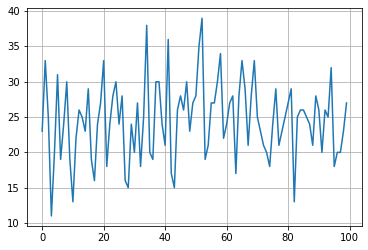

In [113]:
n_runs = 100
result_of_10_sprints = []
delivery_total_instance = []

for i in range (n_runs):
    result_of_10_sprints = one_delivery()
    avg = sum(result_of_10_sprints) / len(result_of_10_sprints)
    ##print ("average for try ", i, " is ", avg, " and actual delivery is ", sum(result_of_10_sprints)," items")
    delivery_total_instance.append(sum(result_of_10_sprints))
    del result_of_10_sprints[:]
    
print("the total average after",n_runs,"runs of 10 sprints is:", sum(delivery_total_instance)/len(delivery_total_instance))
pylab.plot(delivery_total_instance)
pylab.grid(True)
pylab.show()

    

As we can see in the histogram for the array of deliveries over 100 times 10 sprints, the deliveries cluster heavily around the average delivery (25): 

(array([ 3.,  4., 11., 15., 15., 23., 18.,  6.,  3.,  2.]),
 array([11. , 13.8, 16.6, 19.4, 22.2, 25. , 27.8, 30.6, 33.4, 36.2, 39. ]),
 <BarContainer object of 10 artists>)

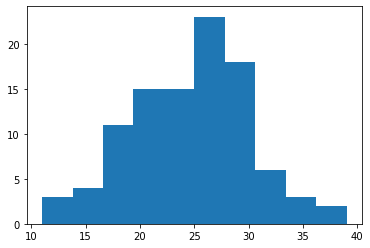

In [114]:
counts, bins = np.histogram(delivery_total_instance)
plt.hist(bins[:-1], bins, weights=counts)